In [1]:
from merge_tiff import *
from caiman_process import *
from data_proc import *
import tifffile
import caiman as cm
from caiman.source_extraction.cnmf import cnmf as cnmf
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf.utilities import detrend_df_f
from caiman.components_evaluation import estimate_components_quality_auto, estimate_components_quality
import os, h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
import scipy
from scipy.stats import norm

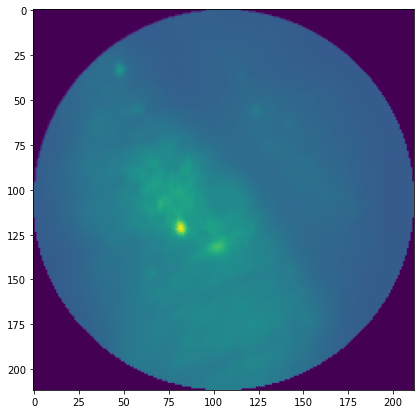

In [21]:
def get_image(ims, i):
    return ims.pages[i].asarray()
file = r"C:\Users\right\Desktop\lab\hard drive\madeline_data_output_2\successful\JUV010-211215-gonogo-003_merge0.tif"
tf = tifffile.TiffFile(file)
T = len(tf.pages)
# get_image(tf, i) -> matrix
x_hat = get_image(tf, 0)
for t in range(2, T+1):
    x_hat = (x_hat * (t-1) + get_image(tf, t-1)) / t
plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(x_hat)
# plt.subplot(122)
# plt.imshow(A_prd)

In [29]:
tifffile.imsave('test.tif', np.concatenate([x_hat[np.newaxis, :, :] for _ in range(10)], axis=0), imagej=True)

In [32]:
merged = np.concatenate([tf.pages[i].asarray()[np.newaxis, :, :] for i in range(T)], axis=0)

In [34]:
tifffile.imsave('test_merge.tif', merged, imagej=True)

D:\Programs\anaconda3\envs\caiman\lib\site-packages\tifffile\tifffile.py:2774: UserWarning: TiffWriter: truncating ImageJ file
  'TiffWriter: truncating ImageJ file', UserWarning
